In [10]:
#program to analyse data about beer consumption in Sao Palo Brazil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("beer_data.csv")

data=data.dropna()
data = data.reset_index(drop=True)

In [2]:
%matplotlib inline

In [12]:
data_temp_range=data.groupby("Avg Temp (C)")
#data_temp_range.describe()
data_temp_range.head(20)

,Data,Avg Temp (C),Minimum Temp (C),Maximum Temp (C),Precipitation,Weekend,Beer consumption (liters)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467


<AxesSubplot:xlabel='meant temp range'>

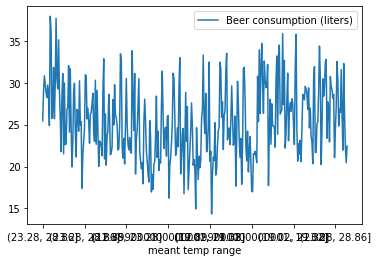

In [4]:
data["meant temp range"]=pd.qcut(data["Avg Temp (C)"], q=4)
data.plot(x="meant temp range",y="Beer consumption (liters)")

Text(0.5, 0, 'average temparatue')

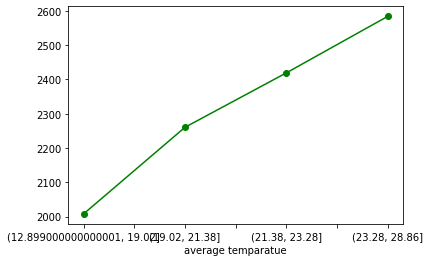

In [5]:
dp_group=data.groupby("meant temp range")
group = dp_group["Beer consumption (liters)"].sum()
#group.head()
ax=group.plot(kind="line",color="green",marker="o")
ax.set_xlabel("average temparatue")
#ax.set_ylable("volume consumed")
#group.head()
#plt.plot(group,[1,2,3,4])
#plt.hist(group)

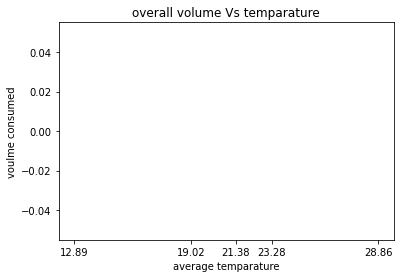

In [6]:
fig,ax = plt.subplots(1,1)
a = np.array([2007.616,2260.393,2419.251,2584.239])
ax.hist(a, bins = [12.89,19.02,21.38,23.28,28.86])
ax.set_title("overall volume Vs temparature")
ax.set_xticks([12.89,19.02,21.38,23.28,28.86])
ax.set_xlabel('average temparature')
ax.set_ylabel('voulme consumed')
plt.show()

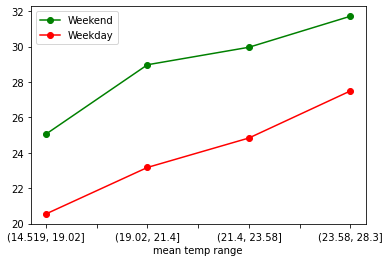

In [7]:
weekend_df=data[data.Weekend==1]
weekend_df=weekend_df.reset_index(drop=True)
weekend_df["mean temp range"]=pd.qcut(weekend_df["Avg Temp (C)"], q=4)
weekend_df=weekend_df.groupby("mean temp range")
weekend_df=weekend_df["Beer consumption (liters)"].mean()
ax=weekend_df.plot(kind="line",color="green",marker="o",label='Weekend')


weekday_df=data[data.Weekend==0]
weekday_df=weekday_df.reset_index(drop=True)
weekday_df["mean temp range"]=pd.qcut(weekday_df["Avg Temp (C)"], q=4)
weekday_df=weekday_df.groupby("mean temp range")
weekday_df=weekday_df["Beer consumption (liters)"].mean()
ax=weekday_df.plot(kind="line",color="red",marker="o",label='Weekday')
ax.legend()


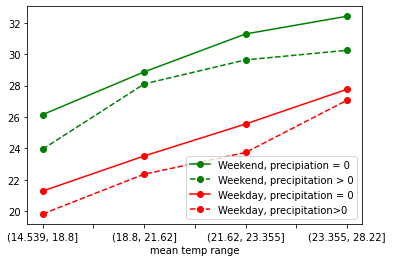

In [8]:
weekend_df=data[data.Weekend==1]
weekend_df=weekend_df[weekend_df.Precipitation==0]
weekend_df=weekend_df.reset_index(drop=True)
weekend_df["mean temp range"]=pd.qcut(weekend_df["Avg Temp (C)"], q=4)
weekend_df=weekend_df.groupby("mean temp range")
weekend_df=weekend_df["Beer consumption (liters)"].mean()
#print(weekend_df.head())
ax=weekend_df.plot(kind="line",color="green",marker="o",label='Weekend, precipiation = 0')

weekend_df=data[data.Weekend==1]
weekend_df=weekend_df[weekend_df.Precipitation!=0]
weekend_df=weekend_df.reset_index(drop=True)
weekend_df["mean temp range"]=pd.qcut(weekend_df["Avg Temp (C)"], q=4)
weekend_df=weekend_df.groupby("mean temp range")
weekend_df=weekend_df["Beer consumption (liters)"].mean()
#print(weekend_df.head())
ax=weekend_df.plot(kind="line",color="green",marker="o",label='Weekend, precipitation > 0',linestyle = '--')


weekday_df=data[data.Weekend==0]
weekday_df=weekday_df[weekday_df.Precipitation==0]
weekday_df=weekday_df.reset_index(drop=True)
weekday_df["mean temp range"]=pd.qcut(weekday_df["Avg Temp (C)"], q=4)
weekday_df=weekday_df.groupby("mean temp range")
weekday_df=weekday_df["Beer consumption (liters)"].mean()
#print(weekend_df.head())
ax=weekday_df.plot(kind="line",color="red",marker="o",label='Weekday, precipitation = 0')
ax.legend()


weekday_df=data[data.Weekend==0]
weekday_df=weekday_df[weekday_df.Precipitation!=0]
weekday_df=weekday_df.reset_index(drop=True)
weekday_df["mean temp range"]=pd.qcut(weekday_df["Avg Temp (C)"], q=4)
weekday_df=weekday_df.groupby("mean temp range")
weekday_df=weekday_df["Beer consumption (liters)"].mean()
#print(weekend_df.head())
ax=weekday_df.plot(kind="line",color="red",marker="o",label='Weekday, precipitation>0',linestyle = '--')
ax.legend()

In [9]:
print(data[data.Weekend==0]["Beer consumption (liters)"].mean())
print(data[data.Weekend==1]["Beer consumption (liters)"].mean())

23.99822222222222
28.92272115384615
